# Chapter 25 处理多个模型
* 通过实例演示如何使用多个简单模型来更好地理解复杂数据集。
* 介绍如何使用列表列在数据框中保存任意数据结构。

## 25.1 gapminder
gapminder数据研究了各国随着时间的推移预期寿命和GDP等统计数据的变化。

我们将只关注该数据其中三个变量，探究这个问题：“每个国家（country)的寿命的期望值(lifeExp)随时间(year)如何变化？”。我们用多个简单模型来识别信号，这样我们就可能可以看到微妙的信号区别。我们还将了解模型如何帮助找出异常值和不寻常的趋势。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gapminder = pd.read_csv(r'gapminder.csv')
gapminder.head(5)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


处理得到列表列：GroupBy对象支持迭代操作，会产生一个由分组变量名和数据块组成的二元元组

In [26]:
gapminder_data = pd.DataFrame(columns = ['continent', 'country', 'data'])
for (k1,k2), group in gapminder.groupby(['continent', 'country']):
    gapminder_data = gapminder_data.append({'continent':k1,'country':k2,'data':group.reset_index().iloc[:,3:]}, ignore_index=True)

In [28]:
gapminder_data

,continent,country,data
0,Africa,Algeria,year lifeExp pop gdpPercap 0 1...
1,Africa,Angola,year lifeExp pop gdpPercap 0 1...
2,Africa,Benin,year lifeExp pop gdpPercap 0 19...
3,Africa,Botswana,year lifeExp pop gdpPercap 0 1...
4,Africa,Burkina Faso,year lifeExp pop gdpPercap 0 1...
...,...,...,...
137,Europe,Switzerland,year lifeExp pop gdpPercap 0 19...
138,Europe,Turkey,year lifeExp pop gdpPercap 0 1...
139,Europe,United Kingdom,year lifeExp pop gdpPercap 0 ...
140,Oceania,Australia,year lifeExp pop gdpPercap 0 1...


In [29]:
gapminder_data['data'][0]

,year,lifeExp,pop,gdpPercap
0,1952,43.077,9279525,2449.008185
1,1957,45.685,10270856,3013.976023
2,1962,48.303,11000948,2550.816880
3,1967,51.407,12760499,3246.991771
4,1972,54.518,14760787,4182.663766
5,1977,58.014,17152804,4910.416756
6,1982,61.368,20033753,5745.160213
7,1987,65.799,23254956,5681.358539
8,1992,67.744,26298373,5023.216647
9,1997,69.152,29072015,4797.295051


In [37]:
gapminder_g = gapminder.pivot_table(index=['continent','country'],columns='year',values='lifeExp')
gapminder_g

year                        1952    1957    1962    1967    1972    1977  \
continent country                                                          
Africa    Algeria         43.077  45.685  48.303  51.407  54.518  58.014   
          Angola          30.015  31.999  34.000  35.985  37.928  39.483   
          Benin           38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana        47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso    31.975  34.906  37.814  40.697  43.591  46.137   
...                          ...     ...     ...     ...     ...     ...   
Europe    Switzerland     69.620  70.560  71.320  72.770  73.780  75.390   
          Turkey          43.585  48.079  52.098  54.336  57.005  59.507   
          United Kingdom  69.180  70.420  70.760  71.360  72.010  72.760   
Oceania   Australia       69.120  70.330  70.930  71.100  71.930  73.490   
          New Zealand     69.390  70.260  71.240  71.520  71.890  72.220   

year                        1982    1987    1992    1997    2002    2007  
continent country                                                         
Africa    Algeria         61.368  65.799  67.744  69.152  70.994  72.301  
          Angola          39.942  39.906  40.647  40.963  41.003  42.731  
          Benin           50.904  52.337  53.919  54.777  54.406  56.728  
          Botswana        61.484  63.622  62.745  52.556  46.634  50.728  
          Burkina Faso    48.122  49.557  50.260  50.324  50.650  52.295  
...                          ...     ...     ...     ...     ...     ...  
Europe    Switzerland     76.210  77.410  78.030  79.370  80.620  81.701  
          Turkey          61.036  63.108  66.146  68.835  70.845  71.777  
          United Kingdom  74.040  75.007  76.420  77.218  78.471  79.425  
Oceania   Australia       74.740  76.320  77.560  78.830  80.370  81.235  
          New Zealand     73.840  74.320  76.330  77.550  79.110  80.204  

[142 rows x 12 columns]

“每个国家（country)的寿命的期望值(lifeExp)随时间(year)如何变化？”

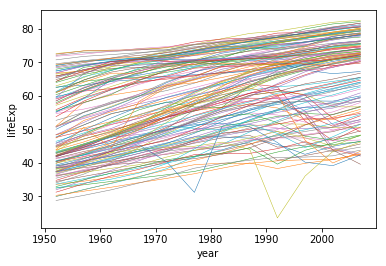

In [38]:
gapminder_g.apply(lambda x: plt.plot(x, lw=0.5), axis = 1)
plt.xlabel('year')
plt.ylabel('lifeExp')
plt.show()

总的来说，寿命的期望值似乎在稳步提高。我们将通过一个线性模型拟合这种趋势，捕捉了寿命的期望值随着时间的推移的稳定增长的部分。然而，如果仔细观察，我们可能会注意到一些国家不遵循这种模式。我们计算残差和 R 方来寻找这些微妙的信号差异。

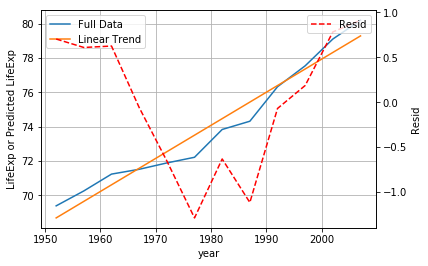

In [3]:
def draw_figure1(gapminder_g, continent, country):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(gapminder_g.loc[(continent, country),:], label='Full Data')
    poly = np.polyfit(list(gapminder_g.loc[(continent, country),:].index),list(gapminder_g.loc[(continent, country),:]), 1)
    polyval = np.polyval(poly, list(gapminder_g.loc[(continent, country),:].index))
    ax.plot(list(gapminder_g.loc[(continent, country),:].index), polyval, label='Linear Trend')
    ax2 = ax.twinx()
    ax2.plot(list(gapminder_g.loc[(continent, country),:].index), list(gapminder_g.loc[(continent, country),:])-polyval,'--r', label = 'Resid')
    ax.legend(loc=0)
    ax.grid()
    ax.set_xlabel("year")
    ax.set_ylabel("LifeExp or Predicted LifeExp")
    ax2.set_ylabel("Resid")
    ax2.legend(loc=1)
    plt.show()
    return

draw_figure1(gapminder_g, 'Oceania', 'New Zealand')

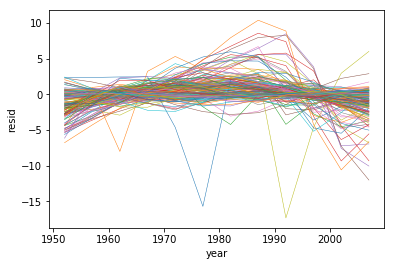

In [5]:
def draw_figure2(gapminder_g):
    for i in range(len(gapminder_g)):   
        poly = np.polyfit(list(gapminder_g.iloc[i,:].index),list(gapminder_g.iloc[i,:]), 1)
        polyval = np.polyval(poly, list(gapminder_g.iloc[i,:].index))
        plt.plot(list(gapminder_g.iloc[i,:].index), list(gapminder_g.iloc[i,:])-polyval, lw = 0.5, label = 'Resid')
    plt.xlabel('year')
    plt.ylabel('resid')
    plt.show()
    return

draw_figure2(gapminder_g)

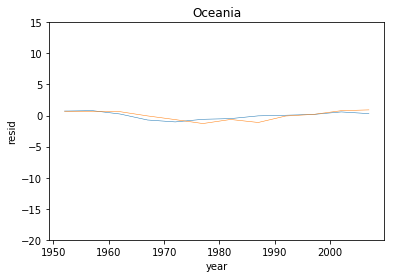

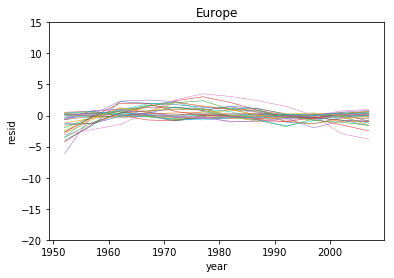

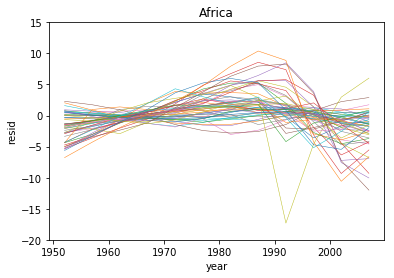

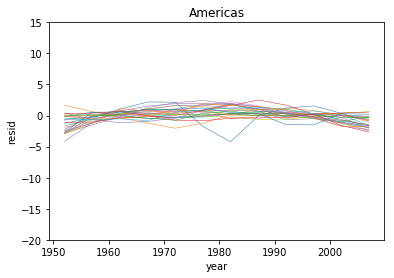

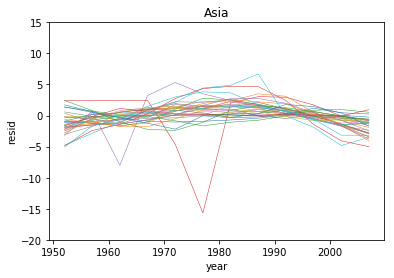

In [43]:
def draw_figure3(gapminder_g, continent):
    gapminder_g = gapminder_g.reset_index()
    temp = gapminder_g[gapminder_g['continent'] == continent]
    for i in range(len(temp)):   
        poly = np.polyfit(list(temp.iloc[i,2:].index),list(temp.iloc[i,2:]), 1)
        polyval = np.polyval(poly, list(temp.iloc[i,2:].index))
        plt.plot(list(temp.iloc[i,2:].index), list(temp.iloc[i,2:])-polyval, lw = 0.5, label = 'Resid')
    plt.xlabel('year')
    plt.ylabel('resid')
    plt.ylim(-20,15)
    plt.title(continent)
    plt.show(continent)
    return

draw_figure3(gapminder_g, 'Oceania')
draw_figure3(gapminder_g, 'Europe')
draw_figure3(gapminder_g, 'Africa')
draw_figure3(gapminder_g, 'Americas')
draw_figure3(gapminder_g, 'Asia')

在非洲国家，我们看到非常大的残差序列，这表明我们的模型并不太合适。

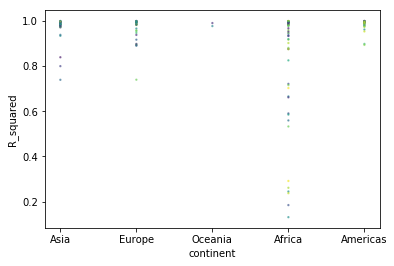

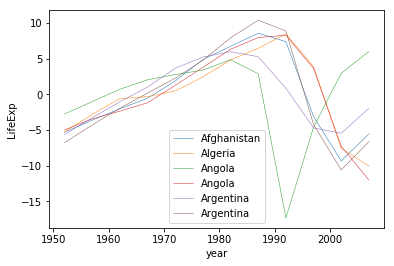

In [7]:
def draw_figure4_5(gapminder_g):
    rsquared = pd.DataFrame(index = gapminder_g.index, columns = ['R_squared', 'x'])
    for i in range(len(gapminder_g)):   
        poly = np.polyfit(list(gapminder_g.iloc[i,:].index),list(gapminder_g.iloc[i,:]), 1)
        polyval = np.polyval(poly, list(gapminder_g.iloc[i,:].index))
        rsquared.iloc[i,0] = np.corrcoef(list(gapminder_g.iloc[i,:]), polyval)[0,1]
    rsquared = rsquared.reset_index()
    temp1 = list(set(rsquared.continent))
    k = 0
    for i in temp1:
        k=k+1
        rsquared.iloc[rsquared.index[rsquared['continent'] == i], 3] = k
    plt.scatter(rsquared['x'], rsquared['R_squared'], s = 2, c=np.random.rand(len(rsquared)),alpha=0.5)
    plt.xticks([1,2,3,4,5],temp1)
    plt.xlabel('continent')
    plt.ylabel('R_squared')
    plt.show()
    temp = rsquared[rsquared['R_squared']<0.3].index
    for i in temp:   
        poly = np.polyfit(list(gapminder_g.iloc[i,:].index),list(gapminder_g.iloc[i,:]), 1)
        polyval = np.polyval(poly, list(gapminder_g.iloc[i,:].index))
        plt.plot(list(gapminder_g.iloc[i,:].index), list(gapminder_g.iloc[i,:])-polyval, lw = 0.5, label = gapminder['country'][i])
    plt.xlabel('year')
    plt.ylabel('LifeExp')
    plt.legend()
    plt.show()
    return

draw_figure4_5(gapminder_g)

## 25.2 列表列
列表列是定义在数据框中的一种数据类型。它以列表为元素，并作为数据框的一列。

列表列作为一种中间数据结构，最大用处是方便对我们数据进行处理和分析。 
### 25.2.1 新建列表列

> data = []  
> for i in range(len(file)):   
> &emsp; data.append(pd.read_csv(file[i],header=0,index_col=0))

In [8]:
pd.DataFrame({'x':[[1,2,3],[4,5,6]], 'y':['1,2','3,4,5']})

,x,y
0,"[1, 2, 3]","1,2"
1,"[4, 5, 6]","3,4,5"


### 25.2.2 嵌套还原

In [57]:
x1 = "a,b,c"
x2 = "d,e,f,g"

data = pd.DataFrame({'x1':[x1, x2], 'x2':[x1.split(','), x2.split(',')]})
data

,x1,x2
0,"a,b,c","[a, b, c]"
1,"d,e,f,g","[d, e, f, g]"


In [10]:
data0 = pd.DataFrame(columns = ['x1','x2'])
for x in range(len(data)):
    for y in range(len(data['x2'][x])):
        data0 = data0.append({'x1':data['x1'][x],'x2':data['x2'][x][y]}, ignore_index=True)

In [56]:
data0

,x1,x2
0,"a,b,c",a
1,"a,b,c",b
2,"a,b,c",c
3,"d,e,f,g",d
4,"d,e,f,g",e
5,"d,e,f,g",f
6,"d,e,f,g",g
